<a href="https://colab.research.google.com/github/KTx735/Image-Classifier/blob/main/Image_Classifier_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import pathlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('seaborn')

from scipy import ndimage
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model

from sklearn.metrics import accuracy_score

import random

Mount drive to upload files for Animal Crossing and DOOM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

 10.webm   41.png   72.png
 11.webm   42.png   73.png
 12.webm   43.png   74.webm
 13.webm   44.png   7.webm
 14.webm   45.png   8.webm
 15.webm   46.png   9.webm
 16.webm   47.png   ac_doom
 17.webm   48.png   Andrés
 18.png    49.png   animal_crossing
 19.png    4.webm   animal_crossing_dataset.csv
 1.webm    50.png   Apk
 20.png    51.png  'Beneath the Mask -instrumental version- Persona 5 OST.mp3'
 21.png    52.png   Classroom
 22.png    53.png  'Colab Notebooks'
 23.png    54.png   config.json
 24.png    55.png   doom
 25.png    56.png   doom_crossing_dataset.csv
 26.png    57.png   Gamecube
 27.png    58.png   img_align_celeba.zip
 28.png    59.png   img_align_half_res.zip
 29.png    5.webm   Interview.mp4
 2.webm    60.png  'Looking Cool Joker! (128 kbps).mp3'
 30.png    61.png   Otros
 31.png    62.png  'Persona 5 OST 55 - Life Goes On.mp3'
 32.png    63.png  'Persona 5 Royal.mlt'
 33.png    64.png  'Persona Overlay'
 34.png    65.png  'Pied Piper - Memo To Clients - Answers.g

In [ ]:
#images_dir = "./gdrive/My Drive/YOUR MAIN FOLDER OR YOUR DATA/ THE SUBFOLDER WHERE THE DATA IS"

animal_crossing_fold = "/content/drive/MyDrive/animal_crossing"
doom_fold = "/content/drive/MyDrive/doom"
ac_doom = "/content/drive/MyDrive/ac_doom"
test = "/content/drive/MyDrive/Test"

Upload csv for Animal Crossing and DOOM

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving animal_crossing_dataset.csv to animal_crossing_dataset.csv
Saving doom_crossing_dataset.csv to doom_crossing_dataset.csv


In [ ]:
animal_crossing = pd.read_csv("animal_crossing_dataset.csv")
doom = pd.read_csv("doom_crossing_dataset.csv")

In [ ]:
animal_crossing_fileNames = list(animal_crossing.filename.values)
doom_fileNames = list(doom.filename.values)

In [ ]:
random.seed(100)
animal_crossing_subset = random.sample(animal_crossing_fileNames, 25)
doom_subset = random.sample(doom_fileNames, 25)

def plot_images(file_subset, ac_flag):
    plt.figure(figsize=(15,15))
    for i in range(25):
        if ac_flag:
            load_img = mpimg.imread(os.path.join(animal_crossing_fold,file_subset[i]))
        else:             
            load_img = mpimg.imread(os.path.join(doom_fold,file_subset[i]))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(load_img)
    plt.show()

In [ ]:
img_height = 128
img_width = 128
colors = 3

numbers_class = 2
class_names = ["animal_crossing", "doom"]
batch_size = 32

In [ ]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip = True,
                                                                validation_split=0.2)


# The images contained in Test are random images downloaded form Doom and Animal Crosssing subreddit
test_ds = img_generator.flow_from_directory(directory = test,
                                            shuffle = False,
                                            target_size=(img_height, img_width),
                                            classes = class_names)

train_ds = img_generator.flow_from_directory(batch_size = batch_size,
                                              directory = ac_doom,
                                              shuffle=True,
                                              target_size=(img_height, img_width),
                                              classes= class_names,
                                              subset='training')

valid_ds = img_generator.flow_from_directory(batch_size = batch_size,
                                              directory = ac_doom,
                                              shuffle=True,
                                              target_size=(img_height, img_width),
                                              classes= class_names,
                                              subset='validation')

Found 32 images belonging to 2 classes.
Found 1278 images belonging to 2 classes.
Found 319 images belonging to 2 classes.


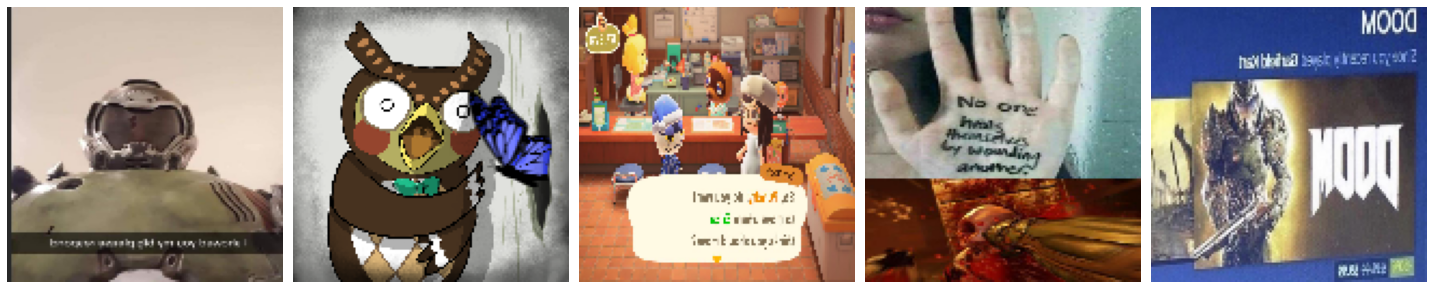

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
sample_training_images, _ = next(train_ds)
plotImages(sample_training_images[:5])

In [ ]:
epoch = 20
steps_per_epoch = np.ceil(train_ds.samples // batch_size)
valid_steps = np.ceil(valid_ds.samples // batch_size)

In [ ]:
cnn = Sequential([Conv2D(128, 3, padding='same',activation='relu', input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu', dilation_rate = (2,2)),
    MaxPooling2D(),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                        

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = cnn.fit(
    train_ds,
    epochs= epoch,
    validation_data = valid_ds,
)

Epoch 1/20
40/40 [==============================] - 533s 13s/step - loss: 1.1635 - accuracy: 0.6635 - val_loss: 0.7629 - val_accuracy: 0.5110
Epoch 2/20
40/40 [==============================] - 83s 2s/step - loss: 0.6746 - accuracy: 0.7285 - val_loss: 0.9917 - val_accuracy: 0.4953
Epoch 3/20
40/40 [==============================] - 83s 2s/step - loss: 0.5525 - accuracy: 0.7488 - val_loss: 0.6001 - val_accuracy: 0.6834
Epoch 4/20
40/40 [==============================] - 84s 2s/step - loss: 0.4715 - accuracy: 0.7809 - val_loss: 0.8966 - val_accuracy: 0.5266
Epoch 5/20
40/40 [==============================] - 84s 2s/step - loss: 0.4158 - accuracy: 0.8122 - val_loss: 0.8345 - val_accuracy: 0.5517
Epoch 6/20
40/40 [==============================] - 84s 2s/step - loss: 0.3891 - accuracy: 0.8459 - val_loss: 0.6351 - val_accuracy: 0.6991
Epoch 7/20
40/40 [==============================] - 84s 2s/step - loss: 0.3727 - accuracy: 0.8365 - val_loss: 1.2563 - val_accuracy: 0.5893
Epoch 8/20
40/40 [

In [ ]:
predictions = cnn.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [ ]:
pred_df = pd.DataFrame({"file": test_ds.filenames,
                        "class": test_ds.classes,
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [ ]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.625

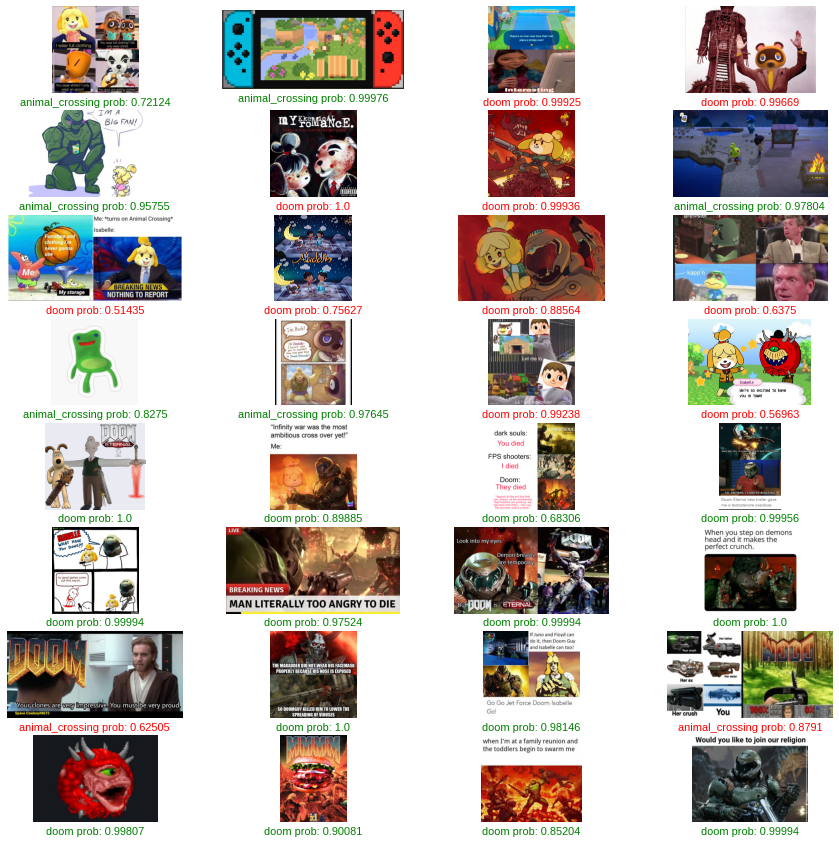

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
    path = os.path.join(test,pred_df.iloc[i,0])
    load_img = mpimg.imread(path)
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'green')
    else:
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()

Can we improve it by adding more parameters? Let's try it.
Here steps_per_epoch and validation_steps are added.

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = cnn.fit(
    train_ds,
    steps_per_epoch= steps_per_epoch,
    epochs= epoch,
    validation_data = valid_ds,
    validation_steps = valid_steps,
)

Epoch 1/20
39/39 [==============================] - 85s 2s/step - loss: 0.1334 - accuracy: 0.9454 - val_loss: 1.0795 - val_accuracy: 0.7604
Epoch 2/20
39/39 [==============================] - 82s 2s/step - loss: 0.1518 - accuracy: 0.9518 - val_loss: 1.3799 - val_accuracy: 0.7014
Epoch 3/20
39/39 [==============================] - 82s 2s/step - loss: 0.1941 - accuracy: 0.9326 - val_loss: 1.2413 - val_accuracy: 0.7431
Epoch 4/20
39/39 [==============================] - 83s 2s/step - loss: 0.0868 - accuracy: 0.9695 - val_loss: 1.7241 - val_accuracy: 0.7431
Epoch 5/20
39/39 [==============================] - 81s 2s/step - loss: 0.0614 - accuracy: 0.9775 - val_loss: 1.1460 - val_accuracy: 0.7708
Epoch 6/20
39/39 [==============================] - 81s 2s/step - loss: 0.0965 - accuracy: 0.9687 - val_loss: 2.0494 - val_accuracy: 0.7083
Epoch 7/20
39/39 [==============================] - 83s 2s/step - loss: 0.1754 - accuracy: 0.9607 - val_loss: 0.9625 - val_accuracy: 0.7604
Epoch 8/20
39/39 [==

In [ ]:
predictions = cnn.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [ ]:
pred_df = pd.DataFrame({"file": test_ds.filenames,
                        "class": test_ds.classes,
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [ ]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.8125

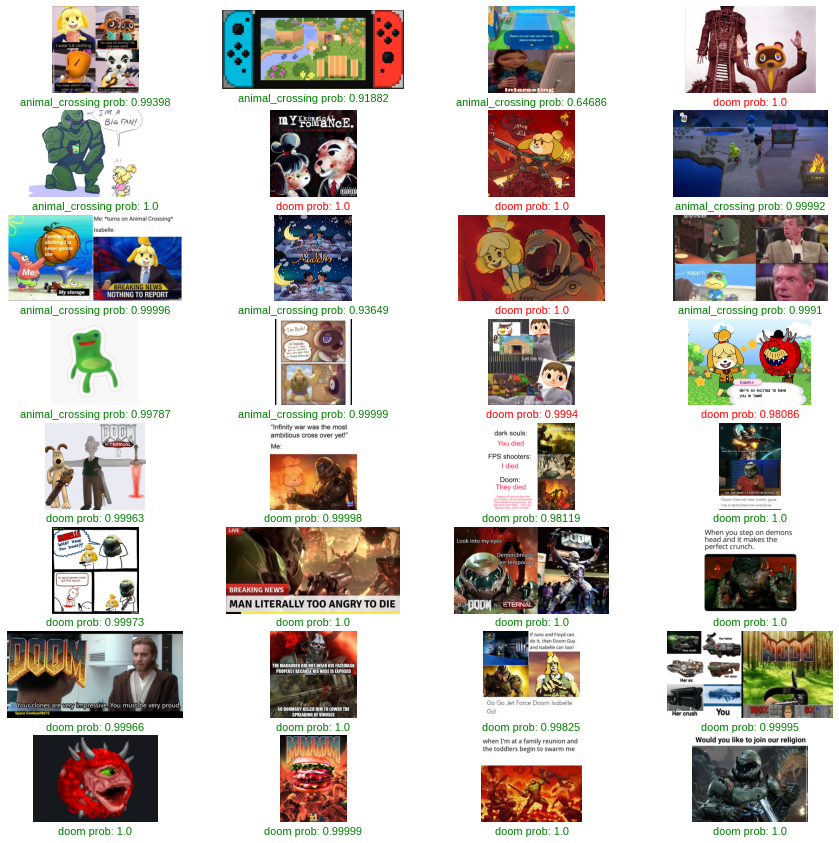

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
    path = os.path.join(test,pred_df.iloc[i,0])
    load_img = mpimg.imread(path)
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'green')
    else:
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()

The improvement was very minuscule, what about if we use callbacks? Only one way to know

In [ ]:
callbacks = [EarlyStopping(patience = 5),
             ReduceLROnPlateau(monitor = 'val_loss', patience = 5),
             ModelCheckpoint('../working/model.best.hdf5', save_best_only=True)]

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = cnn.fit(
    train_ds,
    steps_per_epoch= steps_per_epoch,
    epochs= epoch,
    validation_data = valid_ds,
    validation_steps = valid_steps,
    callbacks = callbacks,
)

Epoch 1/20
39/39 [==============================] - 84s 2s/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 2.1154 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 2/20
39/39 [==============================] - 82s 2s/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 1.4810 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 3/20
39/39 [==============================] - 81s 2s/step - loss: 0.0914 - accuracy: 0.9759 - val_loss: 2.6396 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 4/20
39/39 [==============================] - 81s 2s/step - loss: 0.1477 - accuracy: 0.9655 - val_loss: 2.7651 - val_accuracy: 0.7535 - lr: 0.0010
Epoch 5/20
39/39 [==============================] - 81s 2s/step - loss: 0.1081 - accuracy: 0.9703 - val_loss: 1.7890 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 6/20
39/39 [==============================] - 81s 2s/step - loss: 0.0605 - accuracy: 0.9727 - val_loss: 2.6558 - val_accuracy: 0.7465 - lr: 0.0010
Epoch 7/20
39/39 [==============================] - 81s 2s/step - loss: 0.1019 - a

In [ ]:
pred_df = pd.DataFrame({"file": test_ds.filenames,
                        "class": test_ds.classes,
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [ ]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.8125

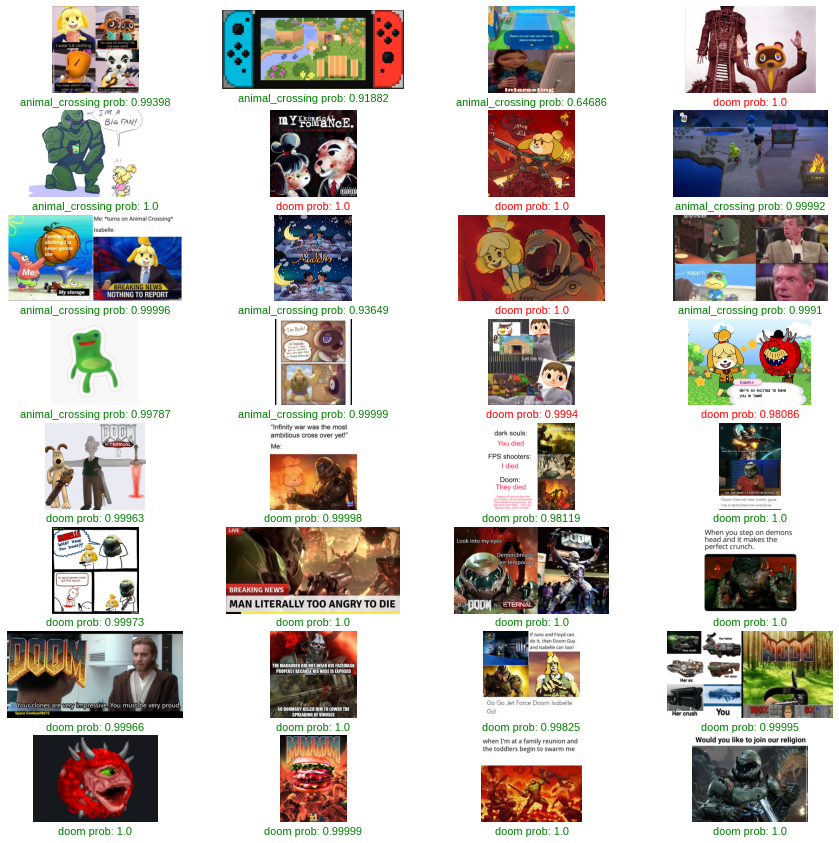

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
    path = os.path.join(test,pred_df.iloc[i,0])
    load_img = mpimg.imread(path)
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'green')
    else:
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()

When using VGG the colab crashes, so let's look for new way to do it.

In [ ]:
def vgg_dropout_bn(input_shape=(img_height, img_width ,3),blocks=3,branching_factor=2,first_layer_filters=32,dropout=0.0,dense_layer=128):
  model = tf.keras.models.Sequential()
  f = first_layer_filters
  for i in range(blocks):
    if i==0:
      model.add(Conv2D(f, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
    else:
      model.add(Conv2D(f, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(f, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(BatchNormalization())
    model.add(Dropout(dropout))
    f = int(f*branching_factor)
  model.add(Flatten())
  if dense_layer>0:
    model.add(Dense(dense_layer, activation='relu'))
    model.add(Dense(dense_layer, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(dropout))
  model.add(Dense(2,activation='softmax'))
  #model.add(Activation('sigmoid'))
  return model

In [ ]:
cnn = vgg_dropout_bn(blocks=4)
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy", metrics=["accuracy"])
all_history = []
 
history = cnn.fit(
    train_ds,
    epochs = 20, 
)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        36928     
                                                      

In [ ]:
predictions = cnn.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [ ]:
pred_df = pd.DataFrame({"file": test_ds.filenames,
                        "class": test_ds.classes,
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [ ]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.625

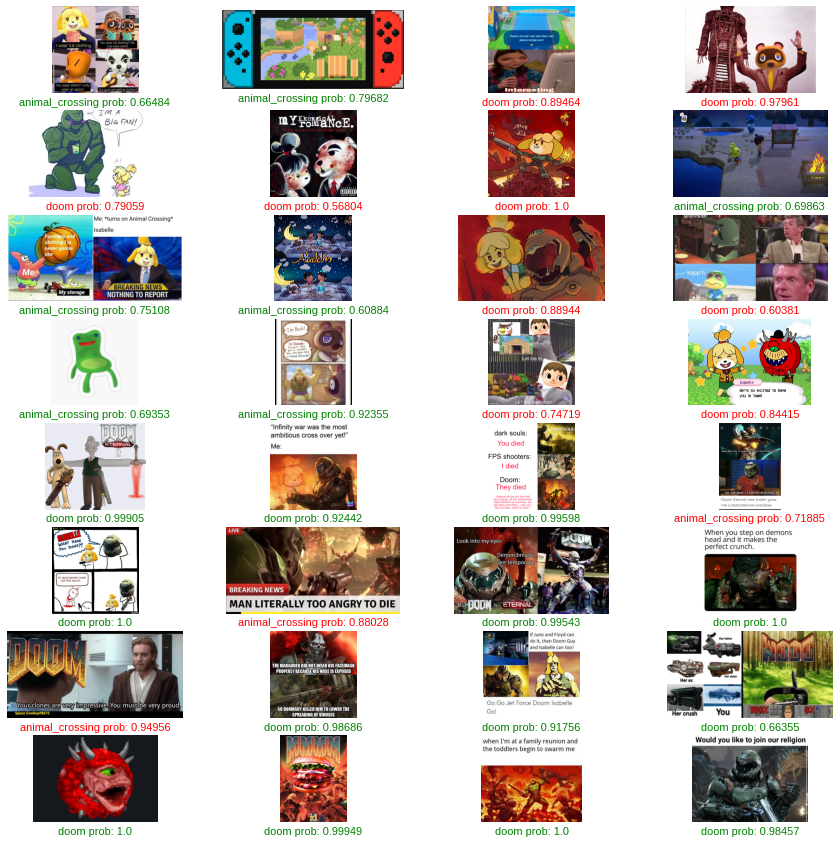

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
    path = os.path.join(test,pred_df.iloc[i,0])
    load_img = mpimg.imread(path)
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'green')
    else:
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()

In [ ]:
def vgg_dropout(input_shape=(img_height, img_width ,3),blocks=3,branching_factor=2,first_layer_filters=32,dropout=0.2,dense_layer=128):
  model = tf.keras.models.Sequential()
  f = first_layer_filters
  for i in range(blocks):
    if i==0:
      model.add(Conv2D(f, kernel_size=(3, 3), input_shape=input_shape, padding='same', activation="relu"))
    else:
      model.add(Conv2D(f, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(f, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(BatchNormalization())
    model.add(Dropout(dropout))
    f = int(f*branching_factor)
  model.add(Flatten())
  if dense_layer>0:
    model.add(Dense(dense_layer, activation='relu'))
    model.add(Dense(dense_layer, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(dropout))
  model.add(Dense(2,activation='softmax'))
  #model.add(Activation('sigmoid'))
  return model

In [ ]:
cnn = vgg_dropout(blocks=4)
cnn.summary() 
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy", metrics=["accuracy"])
all_history = []
 
history = cnn.fit(
    train_ds,
    epochs = 20, 
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 64)        36928     
                                                      

In [ ]:
predictions = cnn.predict(test_ds)
prob_doom = [x[1] for x in predictions]
prob_ac = [x[0] for x in predictions]
predictions = [np.argmax(x) for x in predictions]

In [ ]:
pred_df = pd.DataFrame({"file": test_ds.filenames,
                        "class": test_ds.classes,
                        "label": predictions,
                        "ac_prob": prob_ac,
                        "doom_prob": prob_doom})

In [ ]:
accuracy_score(pred_df.iloc[:,1], pred_df.iloc[:,2])

0.75

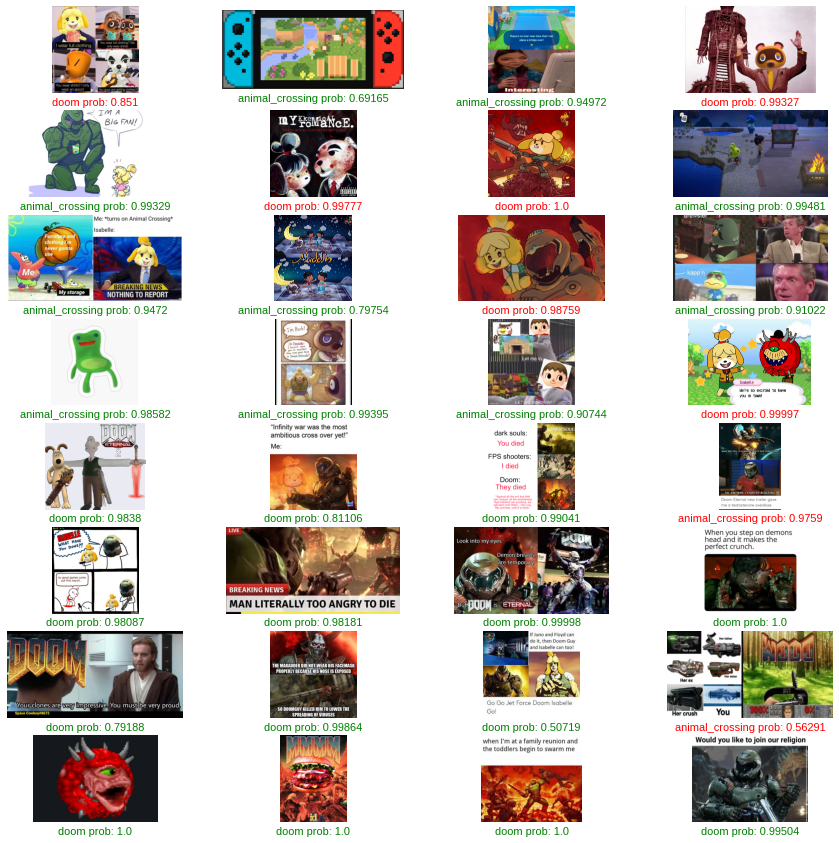

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(32):
    path = os.path.join(test,pred_df.iloc[i,0])
    load_img = mpimg.imread(path)
    plt.subplot(8,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_img)
    prob = round(pred_df.iloc[i,3] if pred_df.iloc[i,2] == 0 else pred_df.iloc[i, 4], 5)
    if pred_df.iloc[i,2] == pred_df.iloc[i,1]: # correct classification
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'green')
    else:
        plt.xlabel(class_names[pred_df.iloc[i,2]] + " prob: " + str(prob), color = 'red')
plt.show()